In [88]:
import pandas as pd
stock_rerurn = "/Users/wwwzhang/Documents/FIN3210/Week3 Assignment/FIN3210 Week 3 Stock returns.xlsx"
df = pd.read_excel(stock_rerurn, sheet_name='data')

In [74]:
import matplotlib.pyplot as plt

In [89]:
df['month'] = pd.to_datetime(df['month'])
df['quarter'] = df['month'].dt.to_period('Q').dt.strftime('%YQ%q')
df.reset_index()

,index,stkcd,stknme,conme,month,retrf,mktrf,smb,hml,umd,...,bm,return12,roa,lev,ppe,intang,numanalyst,instown,mv,quarter
0,0,9,中国宝安,中国宝安集团股份有限公司,2013-07-01,9.0756,1.8833,5.1896,-0.1922,6.1829,...,0.438860,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3
1,1,9,中国宝安,中国宝安集团股份有限公司,2013-08-01,-5.1363,4.5833,5.9407,0.0976,-5.5041,...,0.438860,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3
2,2,9,中国宝安,中国宝安集团股份有限公司,2013-09-01,3.5840,3.3833,0.5848,2.8554,8.8693,...,0.438860,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3
3,3,9,中国宝安,中国宝安集团股份有限公司,2014-01-01,-1.0932,-3.6167,5.6921,1.1126,8.9357,...,0.394303,46.591590,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680,2014Q1
4,4,9,中国宝安,中国宝安集团股份有限公司,2014-02-01,19.0704,0.9833,3.8899,0.6902,-1.8764,...,0.394303,46.591590,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680,2014Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87427,87427,900956,东贝B股,黄石东贝电器股份有限公司,2019-08-01,-5.3373,-1.6917,-0.6838,-5.0887,4.6431,...,5.124264,-4.492293,0.005443,0.598459,0.267594,0.025879,0,0.0000,131675000,2019Q3
87428,87428,900956,东贝B股,黄石东贝电器股份有限公司,2019-09-01,11.0761,0.4083,0.4298,0.8208,-1.3250,...,5.124264,-4.492293,0.005443,0.598459,0.267594,0.025879,0,0.0000,131675000,2019Q3
87429,87429,900956,东贝B股,黄石东贝电器股份有限公司,2019-10-01,12.3759,1.3083,-2.5189,-0.0984,3.5783,...,5.950344,-14.776860,0.010888,0.425125,0.269671,0.025286,0,0.0000,127880000,2019Q4
87430,87430,900956,东贝B股,黄石东贝电器股份有限公司,2019-11-01,0.5954,-1.6917,-0.8970,0.1604,-0.1658,...,5.950344,-14.776860,0.010888,0.425125,0.269671,0.025286,0,0.0000,127880000,2019Q4


In [90]:
def assign_quintile(df,stand):
    df_p = df.copy()
    df_p['label'] = df_p.groupby('quarter')[stand].transform(
        lambda x: pd.qcut(x, 5, labels=False, duplicates='drop') + 1
    )
    return df_p

In [91]:
def monthly_returns(df):
    m_por = df.groupby(['month', 'label'])['retrf'].mean().reset_index()
    m_por_pivot = m_por.pivot(index='month', columns='label', values='retrf')
    return m_por_pivot

In [92]:
def draw(df,address):
    plt.figure(figsize=(10, 6))
    df.plot(kind='bar', color='skyblue')
    plt.title('Average Return of Each Portfolio', fontsize=16)
    plt.xlabel('Portfolio', fontsize=14)
    plt.ylabel('Average Return', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(address)

In [94]:
df_value = assign_quintile(df, 'instown')
por_value = monthly_returns(df_value)
df_value

,stkcd,stknme,conme,month,retrf,mktrf,smb,hml,umd,size,...,return12,roa,lev,ppe,intang,numanalyst,instown,mv,quarter,label
0,9,中国宝安,中国宝安集团股份有限公司,2013-07-01,9.0756,1.8833,5.1896,-0.1922,6.1829,23.10871,...,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3,3
1,9,中国宝安,中国宝安集团股份有限公司,2013-08-01,-5.1363,4.5833,5.9407,0.0976,-5.5041,23.10871,...,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3,3
2,9,中国宝安,中国宝安集团股份有限公司,2013-09-01,3.5840,3.3833,0.5848,2.8554,8.8693,23.10871,...,13.374120,0.007949,0.430605,0.086185,0.031575,0,6.4646,11874173952,2013Q3,3
3,9,中国宝安,中国宝安集团股份有限公司,2014-01-01,-1.0932,-3.6167,5.6921,1.1126,8.9357,23.28204,...,46.591590,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680,2014Q1,3
4,9,中国宝安,中国宝安集团股份有限公司,2014-02-01,19.0704,0.9833,3.8899,0.6902,-1.8764,23.28204,...,46.591590,0.025973,0.432246,0.098660,0.029798,0,5.6741,11731143680,2014Q1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87427,900956,东贝B股,黄石东贝电器股份有限公司,2019-08-01,-5.3373,-1.6917,-0.6838,-5.0887,4.6431,19.54512,...,-4.492293,0.005443,0.598459,0.267594,0.025879,0,0.0000,131675000,2019Q3,1
87428,900956,东贝B股,黄石东贝电器股份有限公司,2019-09-01,11.0761,0.4083,0.4298,0.8208,-1.3250,19.54512,...,-4.492293,0.005443,0.598459,0.267594,0.025879,0,0.0000,131675000,2019Q3,1
87429,900956,东贝B股,黄石东贝电器股份有限公司,2019-10-01,12.3759,1.3083,-2.5189,-0.0984,3.5783,19.41050,...,-14.776860,0.010888,0.425125,0.269671,0.025286,0,0.0000,127880000,2019Q4,1
87430,900956,东贝B股,黄石东贝电器股份有限公司,2019-11-01,0.5954,-1.6917,-0.8970,0.1604,-0.1658,19.41050,...,-14.776860,0.010888,0.425125,0.269671,0.025286,0,0.0000,127880000,2019Q4,1


In [95]:
df_size = assign_quintile(df, 'size') 

In [96]:
por_size = monthly_returns(df_size)

In [97]:
portfolio_mean_size = por_size.mean(axis=0)
portfolio_mean_value = por_value.mean(axis=0)
portfolio_mean_value

label
1    1.072242
2    1.242938
3    1.354161
4    1.369625
5    1.564208
dtype: float64

In [98]:
por_size.to_csv('size_portfolio_returns.csv')

In [99]:
por_value.to_csv('value_portfolio_returns.csv')

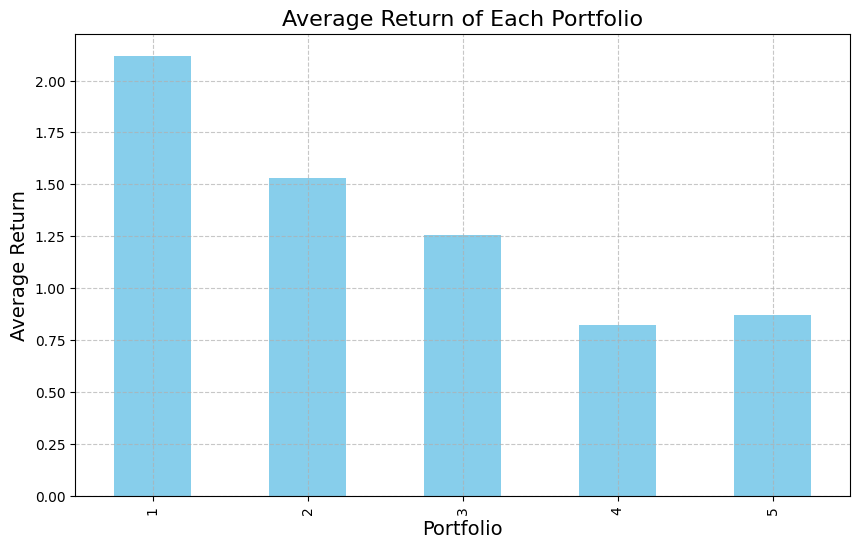

In [100]:

draw(portfolio_mean_size,'/Users/wwwzhang/Documents/FIN3210/Week3 Assignment/size.png')

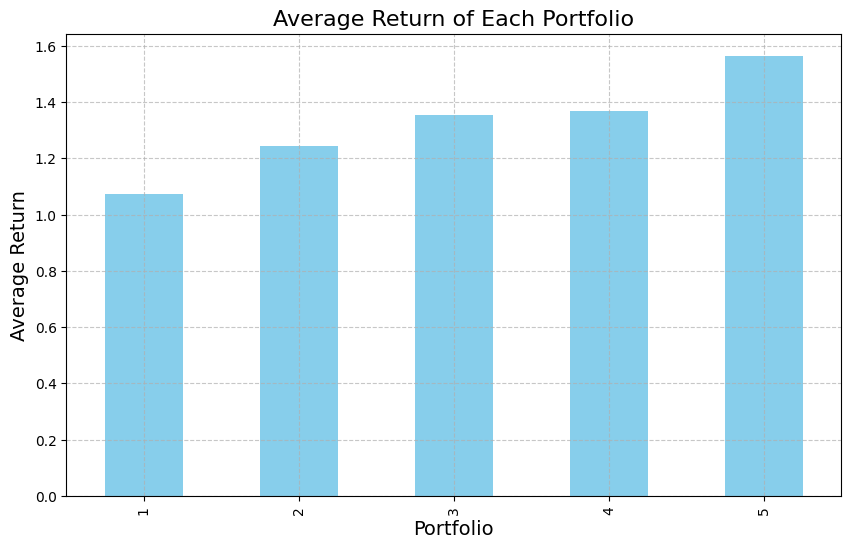

In [101]:
draw(portfolio_mean_value,'/Users/wwwzhang/Documents/FIN3210/Week3 Assignment/value.png')

End of Question 1 & 2

In [54]:
!pip install linearmodels

  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s eta 0:00:00a 0:00:010m
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.1 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)


In [55]:
from linearmodels.panel import PanelOLS

In [56]:
df = df.set_index(['stkcd','month'])
exog_vars = ['size', 'bm', 'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown']
exog = df[exog_vars]
endog = df['retrf']

In [58]:
mod = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
res.summary

Dep. Variable:,retrf,R-squared:,0.0123
Estimator:,PanelOLS,R-squared (Between):,-1202.4
No. Observations:,87432,R-squared (Within):,0.0111
Date:,"Wed, Sep 18 2024",R-squared (Overall):,-38.009
Time:,21:12:11,Log-likelihood,-3.277e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,117.96
Entities:,2035,P-value,0.0000
Avg Obs:,42.964,Distribution:,"F(9,85296)"
Min Obs:,3.0000,,
Max Obs:,93.000,F-statistic (robust):,13.944


In [59]:
with open('panel_regression_results.txt', 'w') as file:
    file.write(res.summary.as_text())